# **HEART DISEASE PREDICTION ANALYSIS**

In [1]:
import csv
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart disease.csv to Heart disease.csv


In [3]:
df = pd.read_csv("Heart disease.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.size

4242

In [8]:
df.shape

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

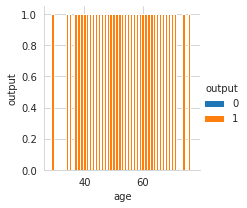

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue = "output").map(plt.bar,"age","output").add_legend()


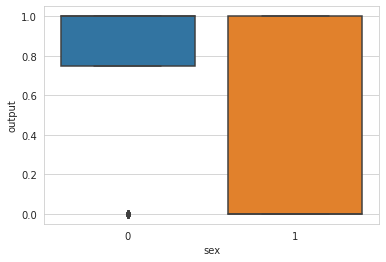

In [12]:
sns.boxplot('sex','output',data = df)

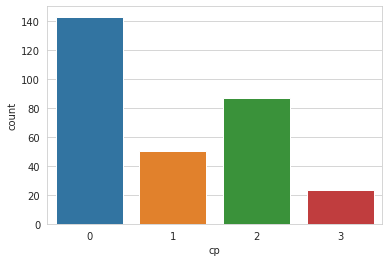

In [13]:
sns.countplot(data=df,x = 'cp')

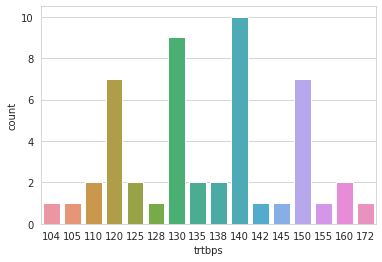

In [14]:
a=df.head(50)
sns.countplot(data=a,x='trtbps')

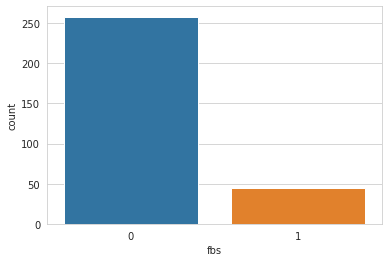

In [15]:
sns.countplot(data = df, x='fbs')

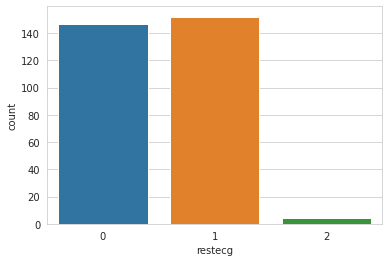

In [16]:
sns.countplot(data=df, x='restecg')



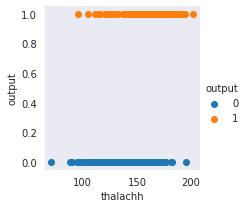

In [17]:
sns.set_style("dark")
sns.FacetGrid(df,hue = "output").map(plt.scatter,"thalachh","output").add_legend()


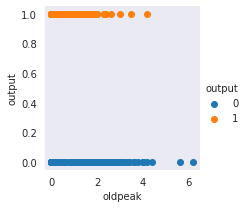

In [18]:
sns.set_style("dark")
sns.FacetGrid(df,hue = "output").map(plt.scatter,"oldpeak","output").add_legend()


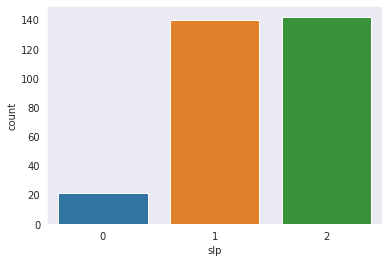

In [19]:
sns.countplot(data=df, x='slp')


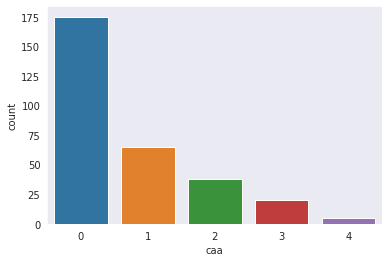

In [20]:
sns.countplot(data=df,x='caa')



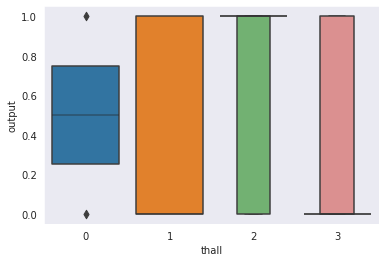

In [ ]:
sns.boxenplot('thall','output',data=df)


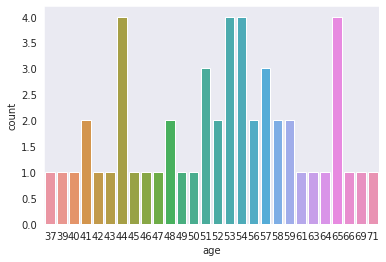

In [21]:

sns.countplot(data=a,x='age')

In [22]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


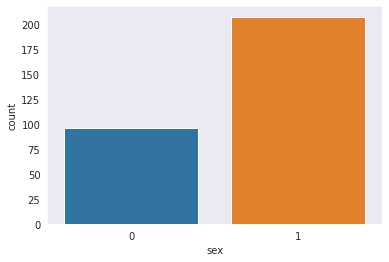

In [23]:
sns.countplot(data=df, x='sex')


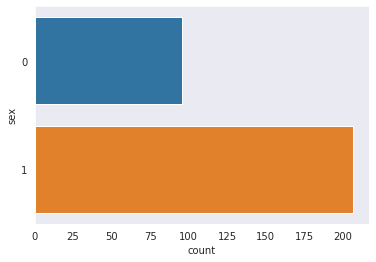

In [24]:
sns.countplot(data=df,y='sex')

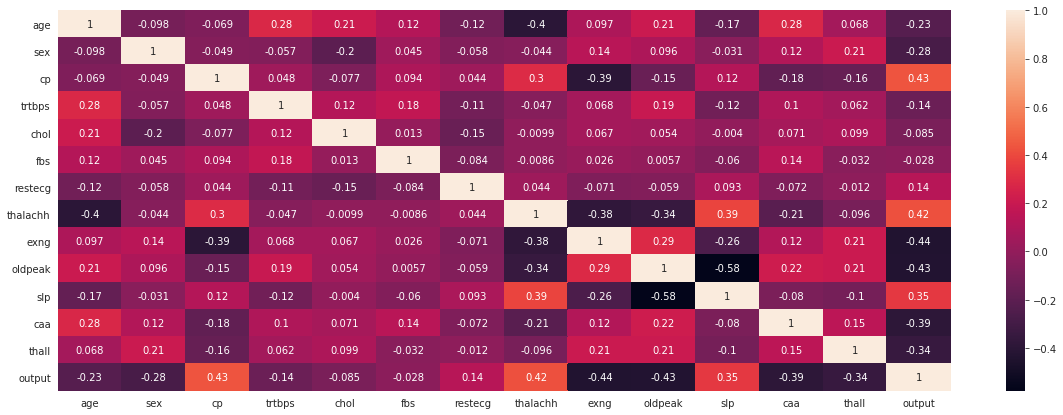

In [25]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

<Figure size 864x432 with 0 Axes>

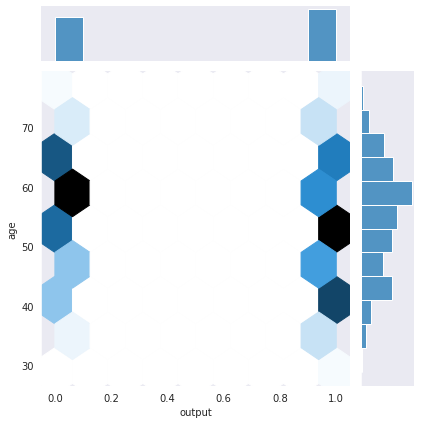

In [26]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df['age'], x=df['output'], kind='hex')


In [27]:
x = df.drop('sex',axis=1)
y = df['sex']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
cd = RandomForestClassifier()
cd.fit(X_train, y_train)
cd_predict=cd.predict(X_test)

In [33]:
cd_conf_matrix = confusion_matrix(y_test, cd_predict)
cd_acc_score = accuracy_score(y_test, cd_predict)
print(cd_conf_matrix)
print(cd_acc_score*100)


[[ 6  7]
 [ 7 41]]
77.04918032786885


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
d = LogisticRegression()
d.fit(X_train, y_train)
d_predict = d.predict(X_test)

In [35]:
d_conf_matrix = confusion_matrix(y_test, d_predict)
d_acc_score = accuracy_score(y_test, d_predict)
print(d_conf_matrix)
print(d_acc_score*100)


[[ 6  7]
 [10 38]]
72.1311475409836


In [36]:
from sklearn.tree import DecisionTreeClassifier
f = DecisionTreeClassifier()
f.fit(X_train, y_train)
f_predict = f.predict(X_test)

In [37]:
f_conf_matrix = confusion_matrix(y_test, f_predict)
f_acc_score = accuracy_score(y_test, f_predict)
print(f_conf_matrix)
print(f_acc_score*100)


[[11  2]
 [14 34]]
73.77049180327869


In [38]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
predi_svc = svc.predict(X_test)

In [39]:
from sklearn .metrics import classification_report, accuracy_score
print(classification_report(y_test,predi_svc))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.86      0.88      0.87        48

    accuracy                           0.79        61
   macro avg       0.68      0.67      0.67        61
weighted avg       0.78      0.79      0.78        61



In [40]:
lin_svc_conf_matrix = confusion_matrix(y_test,cd_predict)
lin_svc_acc_score = accuracy_score(y_test,cd_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[ 6  7]
 [ 7 41]]
77.04918032786885


In [41]:
conclusion = pd.DataFrame({'models':["Random Forest","Logistic Regression","Decision Tree","Support Vector Machine"],
                           'accuracies':[accuracy_score(y_test, cd_predict)*100,accuracy_score(y_test, d_predict)*100,accuracy_score(y_test, f_predict)*100,accuracy_score(y_test, predi_svc)*100]
})
print(conclusion)

                   models  accuracies
0           Random Forest   77.049180
1     Logistic Regression   72.131148
2           Decision Tree   73.770492
3  Support Vector Machine   78.688525


**conclusion**

From All the Classification Algorithms we can see that the Support Vector Machine algorithm which yields highest Accuracy of **78.68%**. Along with Support Vector Machine Random Forest yields second highest accuracy of **77%**, Decision Tree and Logistic Regression also gives a good Accuracy of **72-73%**.


